In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline  # in line ensure the display in notebook result , rather than storoing the display in a file

dataframe=pd.read_csv('C:/Users/Acer/12JAN-18JAN2025-GENAI/DATASETS/Car details v3.csv')
#print(dataframe.head())


In [67]:
car_df=dataframe
numcols=car_df.select_dtypes(include=np.number)
numcols = numcols.fillna(0)
objcols=car_df.select_dtypes(include=['object'])

In [68]:
#the given loop fills the missing values with median
for col in objcols.columns:
    frequency=objcols[col].value_counts()

    #print(frequency)

#check distribution of the Numeric Variables
# how close the variable is to Normal distribution or bell curve


#Skewness: Measures the asymmetry of data distribution.

#Positive skew: Tail on the right.
#Negative skew: Tail on the left.
#Kurtosis: Measures the "tailedness" of a distribution.

#High kurtosis: Heavy tails.
#Low kurtosis: Light tails.
#Outliers: Data points significantly different from others, often affecting statistical analysis and model performance.


#. 1 Asymetric measures - skewness & Kurtosis
     # 
# Vizualisation for distribution

#1. Histogram - Based on frequency distribution
    # used to identify skewness, kurtosis and outliers

#2. Box plot - Based on Quartiles ( Q1 / Q2 / Q3 & Inter Quartile Range (Q3-Q1) )
    # used to identify skewness and outliers
    # Min Side= Q1 - 1.5 x IQR
    # Max Side= Q3 + 1.5 x IQR
    
#3. Density curve - based on std normal distribution scores.
   # used to identify skewness and  kurtosis

#QUARTILES
#Quartiles divide a dataset into four equal parts:

#Q1 (First Quartile): 25% of data below it.
#Q2 (Second Quartile/Median): 50% of data below it.
#Q3 (Third Quartile): 75% of data below it.
#They help summarize data and detect outliers (via the interquartile range).

In [69]:
import matplotlib.pyplot as plt 
numcols.skew()


numcols.kurt()

year               1.707013
selling_price     21.081289
km_driven        384.097414
seats              6.910165
dtype: float64

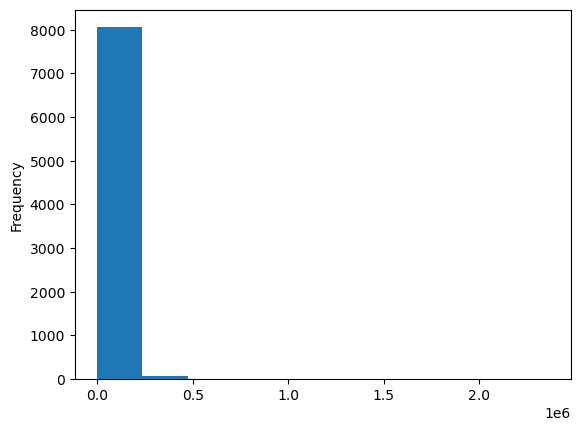

In [70]:


numcols['km_driven'].plot(kind='hist')
plt.show()

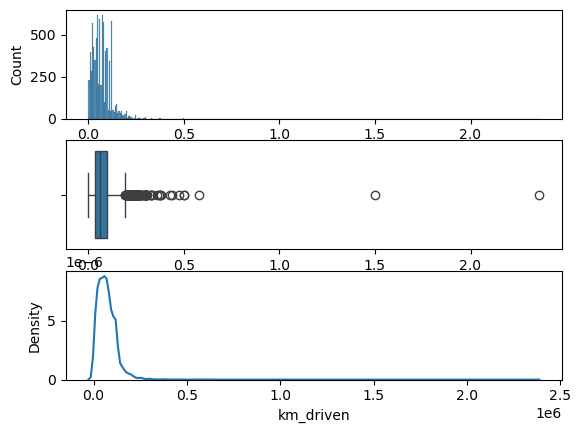

In [71]:
import seaborn as sns

fix,ax=plt.subplots(3,1)
sns.histplot(numcols['km_driven'],ax=ax[0]) #represents Y axis
sns.boxplot(numcols['km_driven'],ax=ax[1],orient="h")
sns.kdeplot(numcols['km_driven'],ax=ax[2])
plt.show()

In [ ]:
objcols.head(2)

In [ ]:
# DUMMY ENCODING - Process of converting obect data to numeric or boolean
#

In [22]:
objcols_dummy=pd.get_dummies(objcols)
objcols_dummy.head(2)
objcols.head(2)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm


# Supervised learning - when we have clear understanding of the data and which algo to be built

# Un Supervised learning - when we do not have clear understanding of the data and which algo to be built


# SUPERVISED LEARNING

# Dependent Variable (y) - numeric continous - Regression algo/Models
    # Primary Algo in regression is Multiple Linear Regression


# Multiple Linear Regression ( MLR) explains liner relationship between a numeric depependant variable (y) and multiple Independat varoables (x)
# It helps understand the relationship between variables and make informed decisions.

#> Multiple Linear Regression is a statistical method to predict a dependent variable using two or more independent variables. It models the relationship as:
#> Y = b₀ + b₁X₁ + b₂X₂ + ... + bₙXₙ + ε,
#> where Y is the target, X₁, X₂, ... Xₙ are predictors, b₀ is the intercept, b₁, b₂, ... bₙ are coefficients, and ε is the error term.

# y - dependant variable
# B0 - intercept or constant
# B1,B2,B3 coefficients
# X1,X2  - Independant variables
# ε  - Error Term or Residual = Actual Value - Predicted Value


# MLR is a parametric algorithm ( assumptions to be met )
# 1. Dependent variable(y) must be numerical,continous,closer to Normal
#    Distribution with min outliers and no missing values
# 2. Independent variables(x) cab be both numerical and non numeric categorial
# 3. There should be relationship between variable(y) & Independant variables
# 4. No multicollinerarity - there is a strong co-relation between variables (usually >0 .90 ). If multicollinerarity occurs , do not include  both
#    variables , choose one among them else OVERFITTING problem occurs.
# 5. Exogenity - Depended variable is dependent on Independent variables but not vice-versa . Y is dependet on x but x do not depend on y
# 6. Sample size required is minimum 20 observations per variable 

# Interpreation of output
# 1. R square .06-.95 ( < .60 underfitting , > .95 overfitting)
#    R Square us amount of variance occuring in depende variables(y) explained by the model
# Intercept is a constant
# 2. Intercept + coefficients for building equation and using the equation to generate predictions ( y hat )

# Residual = Actual value - Predicted values ( i.e the errors )

# Diagnostic for regression models is Root Mean Square Error ( RMSE )
# RMSE = sqrt(mean(y-yhat)^2))


# MLR is used to design a base line model.

# Then a fine tunes version of the model is created based on base model


In [6]:
pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler

car_df_final=pd.read_excel("C:/Users/Acer/12JAN-18JAN2025-GENAI/DATASETS/cardf_cleaned.xlsx")

numcols_standard_scale = StandardScaler().fit_transform(numcols)
numcols_standard_scale=pd.DataFrame(numcols_standard_scale,columns=numcols.columns)

X_num=car_df_final[['km_driven','mileage','engine','max_power']]
y=car_df.selling_price
X=pd.concat([numcols_standard_scale,objcols_dummy],axis=1)

In [61]:
print(" Helloo ")

 Helloo 


In [73]:
regmodel=LinearRegression().fit(X_num,y)


In [74]:
regmodel.score(X_num,y) # R Square

print("Intercept ",regmodel.intercept_)
print("Coefficient ",list(zip(X_num.columns,regmodel.coef_)))

Intercept  -197187.2078250472
Coefficient  [('km_driven', -2.3059420214201056), ('mileage', -11712.111316042376), ('engine', -245.19940335097735), ('max_power', 17574.49898100535)]


In [75]:
regmodel_pred=regmodel.predict(X_num)

np.sqrt(np.mean(np.square(y-regmodel_pred)))

530936.3669042988

In [ ]:
#Correlation Analysis - Check for multicolllinearity